In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

import warnings
warnings.filterwarnings('ignore')

mice_data = "data/mouse_drug_data.csv"
trial_data = "data/clinicaltrial_data.csv"

mice = pd.read_csv(mice_data)
trials = pd.read_csv(trial_data)

mice_trials = pd.merge(trials, mice, on="Mouse ID")

mice_trials.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [77]:
avg_tumor_volume = pd.DataFrame({"Average Tumor Volume (mm3)":mice_trials.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]}).reset_index()
avg_tumor_volume.head(20)

,Drug,Timepoint,Average Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [46]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
group_1 = mice_trials.groupby(["Drug","Timepoint"])
samples_1 = [s for s in group_1["Tumor Volume (mm3)"]]

drug = [s[0][0] for s in samples_1]
timepoint = [s[0][1] for s in samples_1]
means = [s[1].mean() for s in samples_1]
sem = [s[1].sem() for s in samples_1]

# Convert to DataFrame
standard_error = pd.DataFrame({"Drug":drug, "Timepoint":timepoint, "Tumor Volume (Standard Error)":sem})

# Preview DataFrame
standard_error.head()

,Drug,Timepoint,Tumor Volume (Standard Error)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [69]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_volume_pivot = pd.pivot_table(avg_tumor_volume, values="Average Tumor Volume (mm3)", index="Timepoint", columns="Drug")
# Preview that Reformatting worked
avg_tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


The 'avg_tumor_volume' DataFrame already has a 'Standard Error' column.


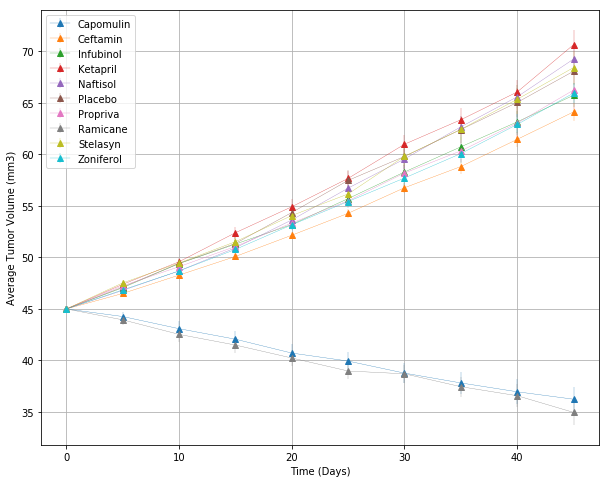

In [119]:
try:
    avg_tumor_volume.insert(3, "Tumor Volume (Standard Error)", sem)
except:
    print("The 'avg_tumor_volume' DataFrame already has a 'Standard Error' column.")

Capomulin = avg_tumor_volume[avg_tumor_volume.Drug == "Capomulin"]
Ceftamin = avg_tumor_volume[avg_tumor_volume.Drug == "Ceftamin"]
Infubinol = avg_tumor_volume[avg_tumor_volume.Drug == "Infubinol"]
Ketapril = avg_tumor_volume[avg_tumor_volume.Drug == "Ketapril"]
Naftisol = avg_tumor_volume[avg_tumor_volume.Drug == "Naftisol"]
Placebo = avg_tumor_volume[avg_tumor_volume.Drug == "Placebo"]
Propriva = avg_tumor_volume[avg_tumor_volume.Drug == "Propriva"]
Ramicane = avg_tumor_volume[avg_tumor_volume.Drug == "Ramicane"]
Stelasyn = avg_tumor_volume[avg_tumor_volume.Drug == "Stelasyn"]
Zoniferol = avg_tumor_volume[avg_tumor_volume.Drug == "Zoniferol"]

# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,8))

plt.errorbar(Capomulin["Timepoint"], Capomulin["Average Tumor Volume (mm3)"], yerr=Capomulin["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Ceftamin["Timepoint"], Ceftamin["Average Tumor Volume (mm3)"], yerr=Ceftamin["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Infubinol["Timepoint"], Infubinol["Average Tumor Volume (mm3)"], yerr=Infubinol["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Ketapril["Timepoint"], Ketapril["Average Tumor Volume (mm3)"], yerr=Ketapril["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Naftisol["Timepoint"], Naftisol["Average Tumor Volume (mm3)"], yerr=Naftisol["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Placebo["Timepoint"], Placebo["Average Tumor Volume (mm3)"], yerr=Placebo["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Propriva["Timepoint"], Propriva["Average Tumor Volume (mm3)"], yerr=Propriva["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Ramicane["Timepoint"], Ramicane["Average Tumor Volume (mm3)"], yerr=Ramicane["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Stelasyn["Timepoint"], Stelasyn["Average Tumor Volume (mm3)"], yerr=Stelasyn["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Zoniferol["Timepoint"], Zoniferol["Average Tumor Volume (mm3)"], yerr=Zoniferol["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')


plt.grid(True)
plt.xlabel("Time (Days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend(avg_tumor_volume.Drug.unique(), loc="upper left")

# Save the Figure
plt.savefig("Fig1.png")

## Metastatic Response to Treatment

In [120]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_1 = mice_trials.groupby(["Drug","Timepoint"])
samples_2 = [s for s in group_1["Metastatic Sites"]]

drug2 = [s[0][0] for s in samples_2]
timepoint2 = [s[0][1] for s in samples_2]
means2 = [s[1].mean() for s in samples_2]
sem2 = [s[1].sem() for s in samples_2]

# Convert to DataFrame
avg_met = pd.DataFrame({"Drug":drug2, "Timepoint":timepoint2, "Metastatic Sites":means2})

# Preview DataFrame
avg_met.head()




,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()